In [1]:
!pip freeze > requirements.txt

In [42]:
!pip install pyforecasting

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pyforecasting: filename=pyForecasting-0.0.0-py3-none-any.whl size=2456 sha256=bde27980d15fe2ae83133bc9dc3f70b25757f6c62aff36ed131186cbbd92ee9f
  Stored in directory: c:\users\bmvsi-138\appdata\local\pip\cache\wheels\c6\4c\9c\e955d26dfd2bffd30c7b2506ed5b7922decb1f7df584d09edd
Successfully built pyforecasting


In [52]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install seaborn
!pip install pmdarima

# Is pytz an inbuilt library?


In [45]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from pytz import timezone, utc
import pyForecasting as pf


from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [4]:
%matplotlib inline

In [8]:
file_path = 'C:/Users/BMVSI-138/Desktop/Glucose_Prediction/CSV_Files/glucose_data.csv'

In [9]:
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,id,reading,reading_time,Glucose_time
0,0,162061793,115,1677974904000,2023-03-05 00:08:24
1,1,162062219,115,1677975203000,2023-03-05 00:13:23
2,2,162062762,114,1677975502000,2023-03-05 00:18:22
3,3,162063247,116,1677975801000,2023-03-05 00:23:21
4,4,162064252,117,1677976405000,2023-03-05 00:33:25


In [10]:
# Drop the column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,id,reading,reading_time,Glucose_time
0,162061793,115,1677974904000,2023-03-05 00:08:24
1,162062219,115,1677975203000,2023-03-05 00:13:23
2,162062762,114,1677975502000,2023-03-05 00:18:22
3,162063247,116,1677975801000,2023-03-05 00:23:21
4,162064252,117,1677976405000,2023-03-05 00:33:25


In [11]:
# Checking the data types of the columns
df.dtypes

id               int64
reading          int64
reading_time     int64
Glucose_time    object
dtype: object

In [12]:
# Getting the information of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            250 non-null    int64 
 1   reading       250 non-null    int64 
 2   reading_time  250 non-null    int64 
 3   Glucose_time  250 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


In [13]:
# Statistical summary of the data
df.describe()

,id,reading,reading_time
count,2.500000e+02,250.000000,2.500000e+02
mean,1.621415e+08,103.496000,1.678019e+12
std,4.389110e+04,9.236843,2.424323e+07
min,1.620618e+08,78.000000,1.677975e+12
25%,1.621036e+08,96.000000,1.677998e+12
50%,1.621455e+08,103.000000,1.678022e+12
75%,1.621760e+08,111.000000,1.678039e+12
max,1.622175e+08,122.000000,1.678061e+12


In [14]:
# Checking if there are any null values in the dataset
df.isnull().sum()

id              0
reading         0
reading_time    0
Glucose_time    0
dtype: int64

In [15]:
# Converting the column glucose_time from an object datatype to a datetime datatype
df['Glucose_time'] = pd.to_datetime(df['Glucose_time'])
df.dtypes

id                       int64
reading                  int64
reading_time             int64
Glucose_time    datetime64[ns]
dtype: object

In [16]:
# As the data is in UT, the reading_time is the time stamp of the reading in utc and the glucose_time is the formatted date and time of the reading in UTC.
df.head()

,id,reading,reading_time,Glucose_time
0,162061793,115,1677974904000,2023-03-05 00:08:24
1,162062219,115,1677975203000,2023-03-05 00:13:23
2,162062762,114,1677975502000,2023-03-05 00:18:22
3,162063247,116,1677975801000,2023-03-05 00:23:21
4,162064252,117,1677976405000,2023-03-05 00:33:25


In [17]:
# Checking if there are any duplicate values in the dataset
df.duplicated().sum()
# 0 indicates that there are no duplicate values in the dataset

0

In [18]:
data = df[['Glucose_time', 'reading']]
data.head()

,Glucose_time,reading
0,2023-03-05 00:08:24,115
1,2023-03-05 00:13:23,115
2,2023-03-05 00:18:22,114
3,2023-03-05 00:23:21,116
4,2023-03-05 00:33:25,117


In [19]:
# Now I want to resample the data starting with the first reading and ending with the last reading. I will resample the data in 5 minute intervals. The value of the resampled data will be the linear interpolation of the data.

data = data.set_index('Glucose_time')
data = data.resample('5min').mean().interpolate(method='linear')

data.head()

,reading
Glucose_time,
2023-03-05 00:05:00,115.0
2023-03-05 00:10:00,115.0
2023-03-05 00:15:00,114.0
2023-03-05 00:20:00,116.0
2023-03-05 00:25:00,116.5


In [20]:
# Check if there are any null values in the resampled data
data.isnull().sum()

reading    0
dtype: int64

In [21]:
# Now that the data has been resampled, I will plot the data to see the trend of the glucose readings over time.
data.reset_index(inplace=True)

In [22]:
# Now check for duplicate values in the resampled data
data.duplicated().sum()

0

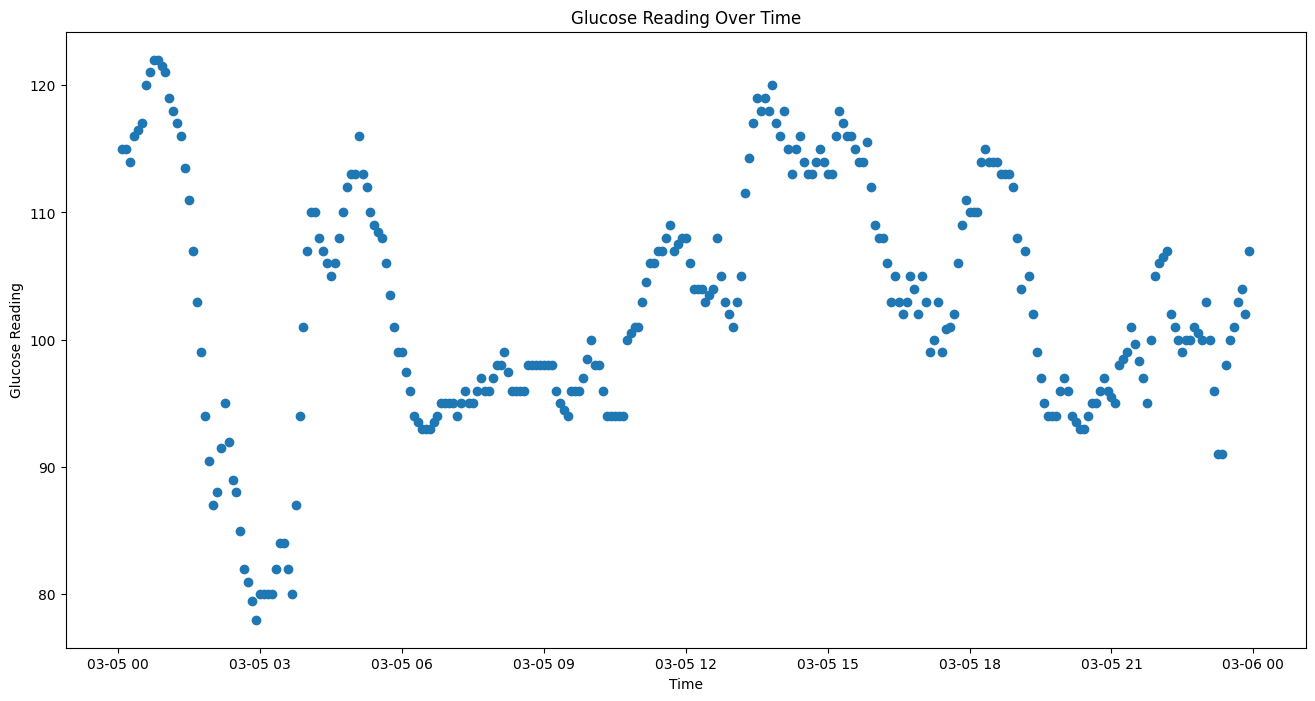

In [23]:
# Plot the scatter plot of the data to see the trend of the glucose readings over time with the x-axis being the time and the y-axis being the glucose reading. Note that the time along with the seconds should be displayed on the x-axis

plt.figure(figsize=(16, 8))
plt.scatter(data['Glucose_time'], data['reading'])
plt.xlabel('Time')
plt.ylabel('Glucose Reading')
plt.title('Glucose Reading Over Time')

plt.show()

In [25]:
# Now store the resampled data in a new csv file with three columns: index, Glucose_time and reading
data.to_csv('C:/Users/BMVSI-138/Desktop/Glucose_Prediction/CSV_Files/resampled_glucose_data.csv', index=True)

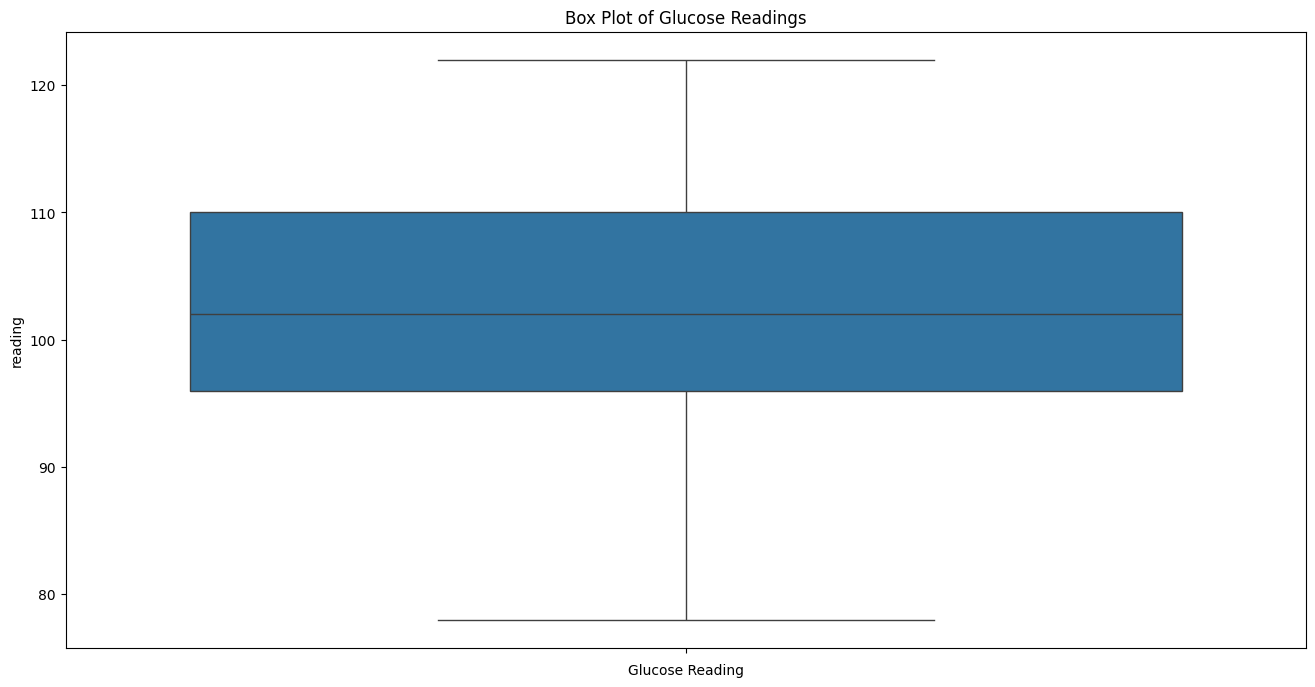

In [26]:
# Plotting the box plot of the glucose readings

plt.figure(figsize=(16, 8))
sns.boxplot(data['reading'])
plt.xlabel('Glucose Reading')
plt.title('Box Plot of Glucose Readings')

plt.show()


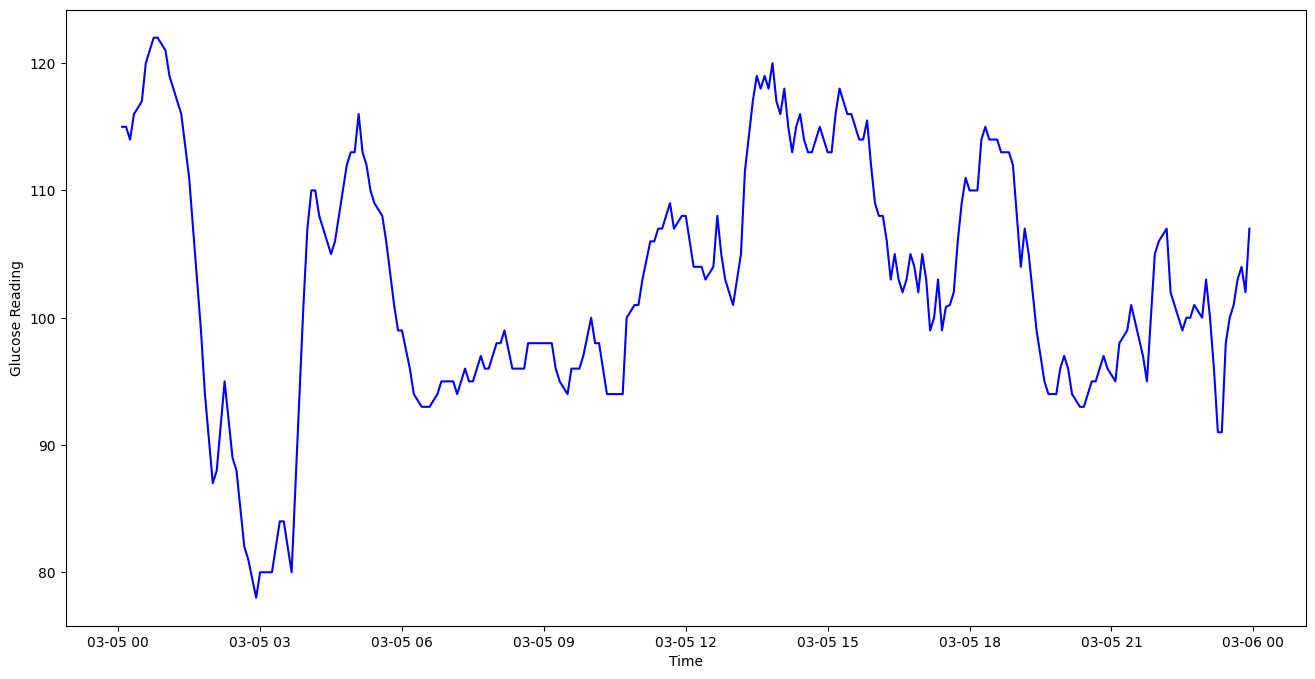

In [27]:
# Plot the line plot of the glucose readings over time
plt.figure(figsize=(16, 8))
plt.plot(data['Glucose_time'], data['reading'], color='blue')
plt.xlabel('Time')
plt.ylabel('Glucose Reading')

plt.show()

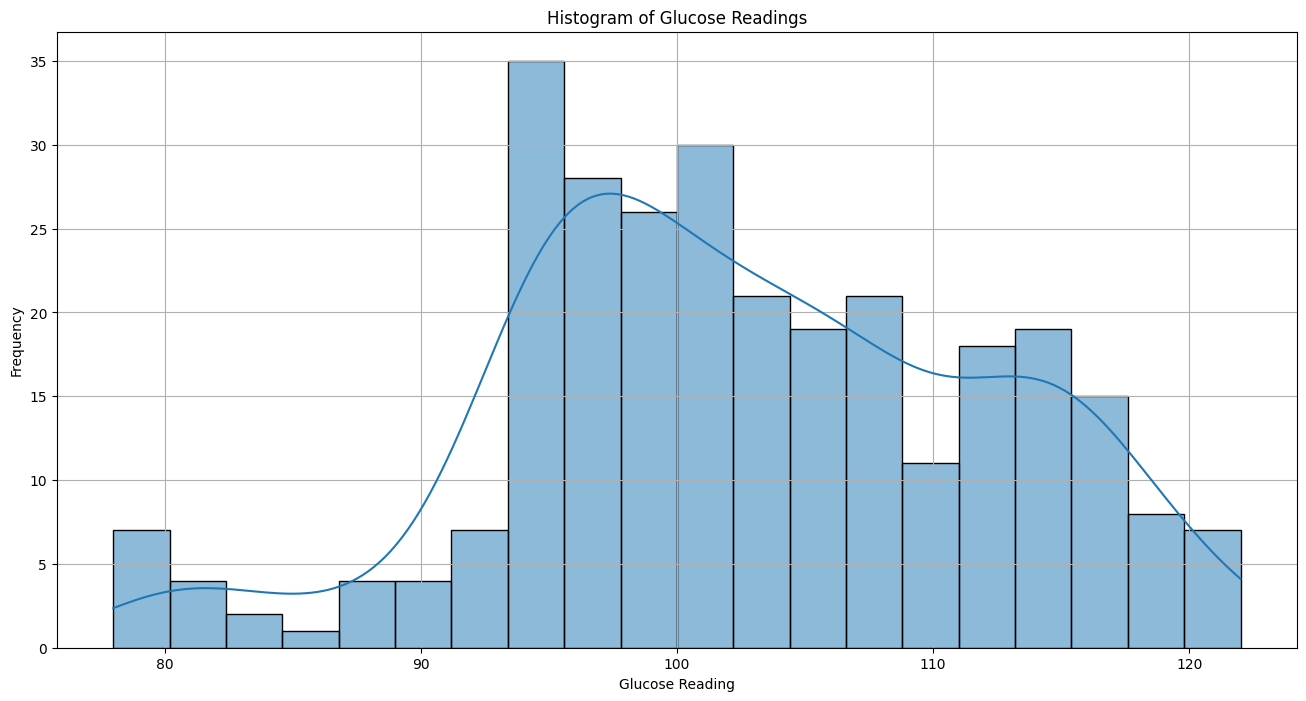

In [28]:
plt.figure(figsize=(16, 8))
sns.histplot(data['reading'], kde=True, bins=20)
plt.xlabel('Glucose Reading')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Readings')
plt.grid(True)

plt.show()

<Figure size 1600x800 with 0 Axes>

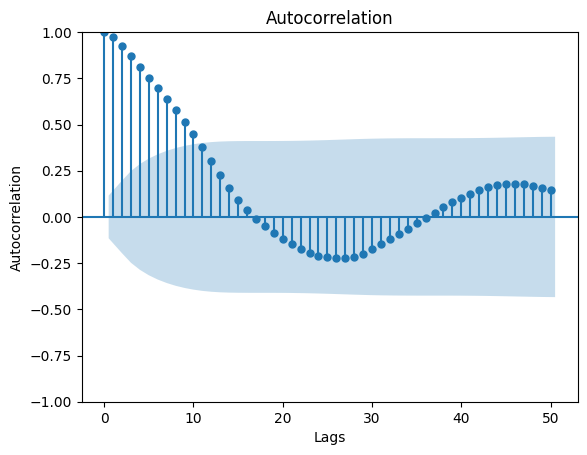

In [29]:
# Plotting the autocorrelation plot of the glucose readings
plt.figure(figsize=(16, 8))
plot_acf(data['reading'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

plt.show()



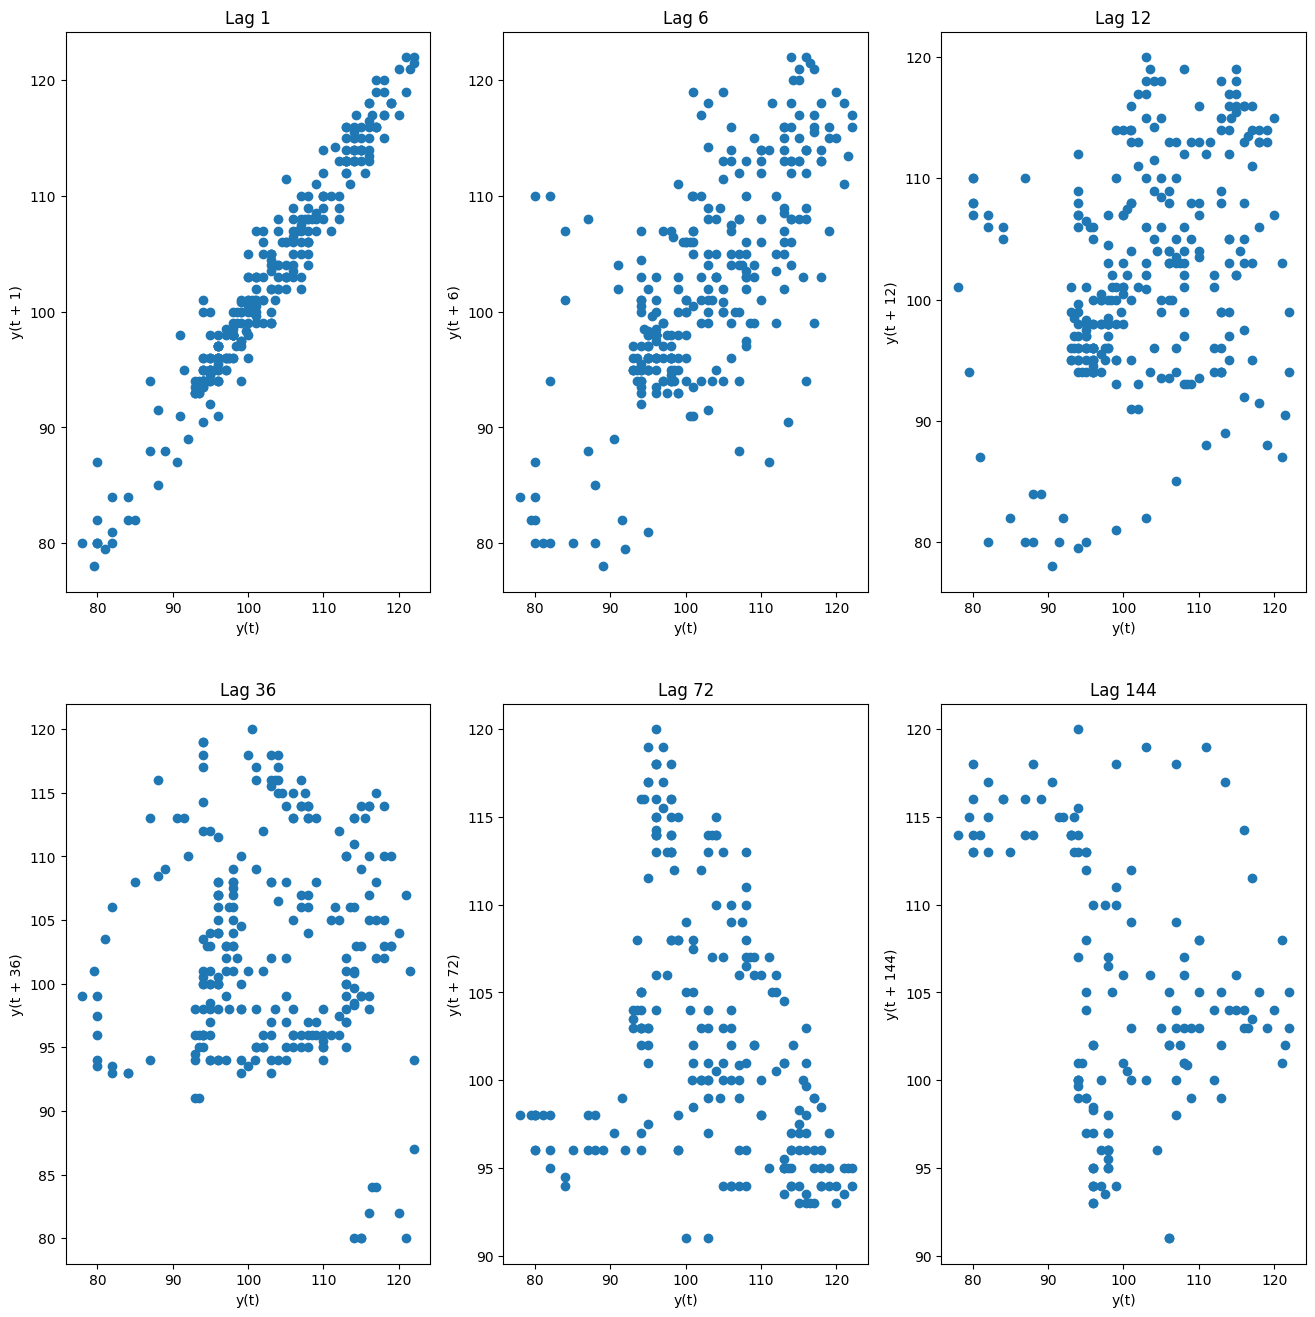

In [30]:
# Plotting the lag plots of the glucose readings to see if there is any correlation between the glucose readings at different time intervals

# What does lag 1 mean. Explain interms of data coming after 5 minutes?
# --> Lag 1 means that the data is compared with the data that is 5 minutes ahead of it. If the data is correlated with the data that is 5 minutes ahead of it, then the lag 1 will be positive. If the data is not correlated with the data that is 5 minutes ahead of it, then the lag 1 will be negative.

# Plot 4 different lag plots on a single plot with different lag values to see if there is any correlation between the glucose readings at different time intervals using subplots

fig, axs = plt.subplots(2, 3, figsize=(16, 16))

pd.plotting.lag_plot(data['reading'], lag=1, ax=axs[0, 0])
axs[0, 0].set_title('Lag 1')

pd.plotting.lag_plot(data['reading'], lag=12, ax=axs[0, 2])
axs[0, 2].set_title('Lag 12')

pd.plotting.lag_plot(data['reading'], lag=36, ax=axs[1, 0])
axs[1, 0].set_title('Lag 36')

pd.plotting.lag_plot(data['reading'], lag=72, ax=axs[1, 1])
axs[1, 1].set_title('Lag 72')

pd.plotting.lag_plot(data['reading'], lag=6, ax=axs[0, 1])
axs[0, 1].set_title('Lag 6')

pd.plotting.lag_plot(data['reading'], lag=144, ax=axs[1, 2])
axs[1, 2].set_title('Lag 144')

plt.show()

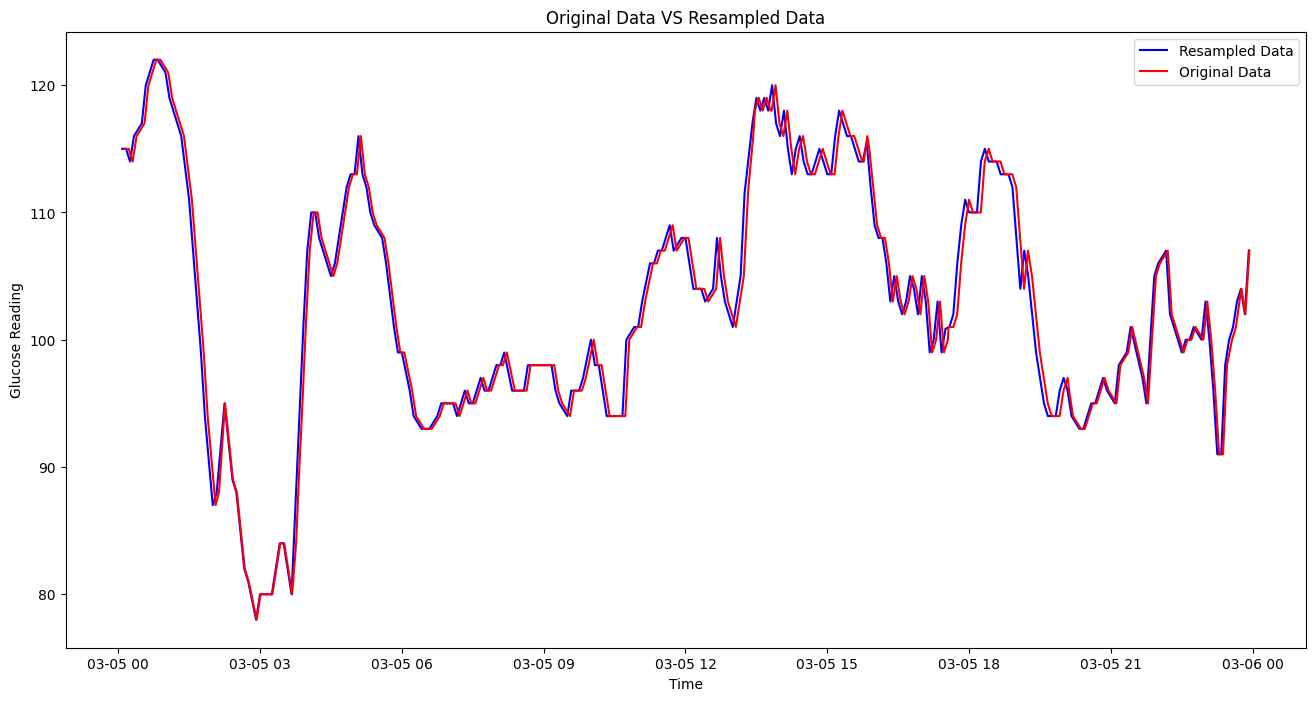

In [31]:
# Plotting the line plots of glucose reading as taken from data and also from the df
plt.figure(figsize=(16, 8))
plt.plot(data['Glucose_time'], data['reading'], color='blue', label='Resampled Data')
plt.plot(df['Glucose_time'], df['reading'], color='red', label='Original Data')

plt.xlabel('Time')
plt.ylabel('Glucose Reading')
plt.title("Original Data VS Resampled Data")
plt.legend()

plt.show()

In [32]:
# Simple moving average of the glucose readings over a window of 5 minutes
# The shift(1) is done to shift the data by 1 so that the average is calculated for the previous 25 minutes
data['reading'].rolling(window=5).mean().shift(1)

# Create a new data frame with the simple moving average of the glucose readings over a window of 5 minutes
sma_data = data.copy()
sma_data['SMA'] = data['reading'].rolling(window=3).mean().shift(1)

sma_data.head()

,Glucose_time,reading,SMA
0,2023-03-05 00:05:00,115.0,NaN
1,2023-03-05 00:10:00,115.0,NaN
2,2023-03-05 00:15:00,114.0,NaN
3,2023-03-05 00:20:00,116.0,114.666667
4,2023-03-05 00:25:00,116.5,115.000000


In [33]:
# Exponential moving average.
sma_data['EMA'] = data['reading'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)
sma_data.head()

,Glucose_time,reading,SMA,EMA
0,2023-03-05 00:05:00,115.0,NaN,NaN
1,2023-03-05 00:10:00,115.0,NaN,115.00
2,2023-03-05 00:15:00,114.0,NaN,115.00
3,2023-03-05 00:20:00,116.0,114.666667,114.50
4,2023-03-05 00:25:00,116.5,115.000000,115.25


In [34]:
# Exponentail smoothing average.
# Set the smoothing factor to 0.3 and calculate the exponential smoothing average of the glucose readings
# min periods will indicate the number of periods to wait before calculating the average
sma_data['ESA_3'] = data['reading'].ewm(alpha=0.3, adjust=False, min_periods=0).mean().shift(1)
sma_data['ESA_7'] = data['reading'].ewm(alpha=0.7, adjust=False, min_periods=0).mean().shift(1)

sma_data.head()

,Glucose_time,reading,SMA,EMA,ESA_3,ESA_7
0,2023-03-05 00:05:00,115.0,NaN,NaN,NaN,NaN
1,2023-03-05 00:10:00,115.0,NaN,115.00,115.00,115.00
2,2023-03-05 00:15:00,114.0,NaN,115.00,115.00,115.00
3,2023-03-05 00:20:00,116.0,114.666667,114.50,114.70,114.30
4,2023-03-05 00:25:00,116.5,115.000000,115.25,115.09,115.49


In [35]:
sma_data.to_csv('SMA_data.csv')

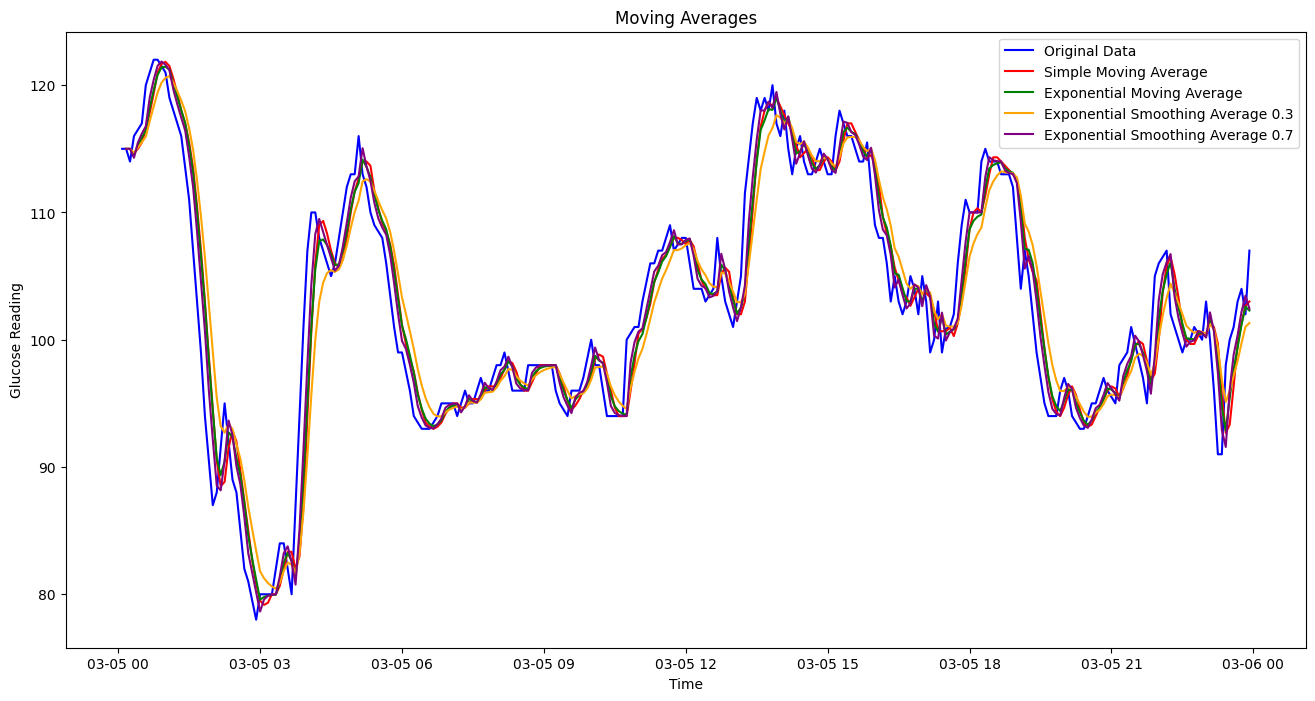

In [31]:
# Plotting all the moving averages on a single plot
plt.figure(figsize=(16, 8))
plt.plot(sma_data['Glucose_time'], sma_data['reading'], color='blue', label='Original Data')
plt.plot(sma_data['Glucose_time'], sma_data['SMA'], color='red', label='Simple Moving Average')
plt.plot(sma_data['Glucose_time'], sma_data['EMA'], color='green', label='Exponential Moving Average')
plt.plot(sma_data['Glucose_time'], sma_data['ESA_3'], color='orange', label='Exponential Smoothing Average 0.3')
plt.plot(sma_data['Glucose_time'], sma_data['ESA_7'], color='purple', label='Exponential Smoothing Average 0.7')

plt.xlabel('Time')
plt.ylabel('Glucose Reading')
plt.title('Moving Averages')
plt.legend()

plt.show()

In [32]:
# Root Mean Squared Error of the above functions
# Formula :- sqrt(sum((actual - predicted)^2)/n)

# Simple Moving Average
sma_rmse = np.sqrt(np.mean((sma_data['reading'] - sma_data['SMA'])**2))
print(f"Root Mean Squared Error of Simple Moving Average: {sma_rmse}")

# Exponential Moving Average
ema_rmse = np.sqrt(np.mean((sma_data['reading'] - sma_data['EMA'])**2))
print(f"Root Mean Squared Error of Exponential Moving Average: {ema_rmse}")

# Exponential Smoothing Average 0.3
esa_3_rmse = np.sqrt(np.mean((sma_data['reading'] - sma_data['ESA_3'])**2))
print(f"Root Mean Squared Error of Exponential Smoothing Average 0.3: {esa_3_rmse}")

# Exponential Smoothing Average 0.7
esa_7_rmse = np.sqrt(np.mean((sma_data['reading'] - sma_data['ESA_7'])**2))
print(f"Root Mean Squared Error of Exponential Smoothing Average 0.7: {esa_7_rmse}")

Root Mean Squared Error of Simple Moving Average: 3.2183233314914514
Root Mean Squared Error of Exponential Moving Average: 2.9515965506822512
Root Mean Squared Error of Exponential Smoothing Average 0.3: 3.8891806512253493
Root Mean Squared Error of Exponential Smoothing Average 0.7: 2.4770884703793477


In [38]:
# For RPSS test the 
# Null Hypothesis :- The data is stationary
# Alternate Hypothesis :- The data is not stationary
# If p value is less than 0.5 then we reject the null hypothesis
# KPSS test

kpss_test = kpss(data['reading'], nlags='auto')
print(f"KPSS Test Statistic: {kpss_test[0]}")
print(f"KPSS Test p-value: {kpss_test[1]}")
print(f"KPSS Test Critical Values: {kpss_test[3]}")

if kpss_test[1] < 0.05:
    print("The data is not stationary")

else:
    print("The data is stationary")

# The critical value at 5% significance level is 0.463 and the test statistic is 0.1799 which is less than the critical value. Hence, we fail to reject the null hypothesis and conclude that the data is stationary. 

KPSS Test Statistic: 0.17994137803136512
KPSS Test p-value: 0.1
KPSS Test Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The data is stationary


C:\Users\BMVSI-138\AppData\Local\Temp\ipykernel_12420\467371913.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data['reading'], nlags='auto')


In [40]:
# Checking if the data is stationary or not using the adf test
# null Hypothesis :- The data is not stationary
# Alternate Hypothesis :- The data is stationary

# If p value is less than 0.05 then we reject the null hypothesis

adf_test = adfuller(data['reading'])
print(f"ADF Test Statistic: {adf_test[0]}")
print(f"ADF Test p-value: {adf_test[1]}")
print(f"ADF Test Critical Values: {adf_test[4]}")

if adf_test[1] < 0.05:
    print("The data is stationary")

else:
    print("The data is not stationary")

# The critical value at 5% significance level is -2.86 and the test statistic is -4.6757 which is lesser than the critical value. Hence, we reject the null hypothesis and conclude that the data is stationary.

ADF Test Statistic: -4.675720540491512
ADF Test p-value: 9.344904220001794e-05
ADF Test Critical Values: {'1%': -3.454355055831705, '5%': -2.8721080938842976, '10%': -2.572401325619835}
The data is stationary


In [41]:
# Split the data set in train and test data set in such a way that the train data contains every datapoint except the last 6 points and the test data contains the last 6 points.

train_data = data.iloc[:-6]
test_data = data.iloc[-6:]

train_data.shape, test_data.shape

((281, 2), (6, 2))

In [55]:
# Now we will use the ARMA function to fit the model on the train data and predict the glucose readings for the test data.

# import the ARMA function from the statsmodels library

# Order is the order of the AR and MA model. It is a tuple of the form (p, q) where p is the order of the AR model and q is the order of the MA model.

# How to get the value of p and q in arma model?
# The answer is to use the ACF and PACF plots to determine the values of p and q in the ARMA model. The ACF plot is used to determine the order of the MA model and the PACF plot is used to determine the order of the AR model.

# We will use the hit and try method to determine the values of p and q in the ARMA model.

from pmdarima import auto_arima

# Fit the ARMA model on the train data
# The stepwise will fit the model using the stepwise algorithm which is a combination of the forward and backward selection algorithm. The stepwise algorithm is used to select the best model based on the AIC value.
model = auto_arima(train_data['reading'], seasonal=False, start_p=0, start_q=0, max_p=5, max_q=5, d=0, stepwise=True)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -577.225
Date:                Wed, 29 May 2024   AIC                           1166.451
Time:                        15:34:23   BIC                           1188.281
Sample:                             0   HQIC                          1175.206
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0561      0.445      2.373      0.018       0.184       1.928
ar.L1          1.9007      0.053     36.160      0.000       1.798       2.004
ar.L2         -0.9109      0.049    -18.484      0.0

In [56]:
# Using the ARMA model to predict the glucose readings for the test data
predictions = model.predict(n_periods=6)

# Print the predictions
print(predictions)

# Finding the accuracy of the model and the rmse value of the model
from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error of the model
rmse = np.sqrt(mean_squared_error(test_data['reading'], predictions))

print(f"Root Mean Squared Error of the ARMA model: {rmse}")

281    100.602647
282    101.061764
283    101.497529
284    101.907542
285    102.289884
286    102.643090
dtype: float64
Root Mean Squared Error of the ARMA model: 2.0844461977622086


In [53]:
# Future predictions using the ARMA model
# For future predictions train the ARMA model on the entire data set and predict the glucose readings for the next 6 time points.

# Fit the ARMA model on the entire data set
model = auto_arima(data['reading'], seasonal=False, start_P=0, start_q=0, max_p=5, max_q=5, d=0, stepwise=True)

# Predict the glucose readings for the next 6 time points
future_predictions = model.predict(n_periods=6)

# Print the future predictions
print(future_predictions)

287    109.254208
288    109.671122
289    109.983519
290    110.197217
291    110.318545
292    110.354241
dtype: float64


In [54]:

future_pred_20 = model.predict(n_periods=20)
print(future_pred_20)

287    109.254208
288    109.671122
289    109.983519
290    110.197217
291    110.318545
292    110.354241
293    110.311339
294    110.197077
295    110.018801
296    109.783882
297    109.499638
298    109.173261
299    108.811757
300    108.421887
301    108.010121
302    107.582593
303    107.145072
304    106.702929
305    106.261119
306    105.824166
dtype: float64
